<a href="https://colab.research.google.com/github/ingridcos/Desafio-SQL-II/blob/main/Python_para_Dados_Atividade_de_Fixa%C3%A7%C3%A3o_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd


**Utilizando o arquivo: carros.csv**

**Dataframe e ordenação**
1. Faça o upload do CSV carros.csv
2. Print seu head com 10 linhas
3. Agora print as colunas e index do dataframe
4. Faça um sort decrescente no dataframe pelo estado com maior
quantidade de carros
5. Descubra qual a proporção de carro para a população de cada estado e
insira em uma nova coluna
6. Faça um dataframe com Estado e proporção de carro por habitante

In [79]:
carros = pd.read_csv('/content/carros.csv')
carros.head(10)

,Região,Estado,Quant Carros,Quant Carros Família com Filhos,População do Estado,Carros por habitante
0,Sul,Acre,4342,1034,23942.0,0.181355
1,Centro-Oeste,Alagoas,18991,3253,23431.0,0.810507
2,Sudeste,Amapá,6463,4152,7747.0,0.834258
3,Centro-Oeste,Amazonas,3180,2955,5189.0,0.612835
4,Centro-Oeste,Bahia,11288,2585,24118.0,0.468032
5,Nordeste,Ceará,10807,4943,40773.0,0.265053
6,Sudeste,Distrito Federal,5786,4459,6899.0,0.838672
7,Sudeste,Espírito Santo,5494,4073,6267.0,0.876655
8,Sudeste,Goiás,24412,2021,36551.0,0.667889
9,Centro-Oeste,Maranhão,8472,4461,16394.0,0.516774


In [80]:
# 3) colunas e index
carros.columns
carros.index

RangeIndex(start=0, stop=27, step=1)

In [81]:
# 4) sort decrescente pelo estado com maior quantidade de carros
carros_ordenado = carros.sort_values('Quant Carros', ascending=False)

In [82]:
# 5) proporção de carro por habitante em nova colu
carros['carros_por_habitante_calc'] = carros['Quant Carros'] / carros['População do Estado']


In [83]:
# 6) novo dataframe só com estado e proporção
carros_prop = carros[['Estado', 'carros_por_habitante_calc']]


**Utilizando o arquivos: concurso.csv**

**Agregação de dados**

7. Qual a média de idade por região?
8. Qual é a porcentagem de pessoas com deficiência?
9. Quantas pessoas são do estado do Piauí?


In [84]:
print("==== HEAD (10 linhas) ====")
print(carros.head(10))

print("\n==== COLUNAS E INDEX ====")
print(carros.columns)
print(carros.index)

print("\n==== DATAFRAME ORDENADO POR QUANT CARROS (TOP 5) ====")
print(carros_ordenado.head())

print("\n==== NOVA COLUNA - CARROS POR HABITANTE ====")
print(carros[['Estado', 'Quant Carros', 'População do Estado', 'carros_por_habitante_calc']].head())

print("\n==== DATAFRAME SOMENTE ESTADO E PROPORÇÃO ====")
print(carros_prop.head())


==== HEAD (10 linhas) ====
         Região            Estado  Quant Carros  \
0           Sul              Acre          4342   
1  Centro-Oeste           Alagoas         18991   
2       Sudeste             Amapá          6463   
3  Centro-Oeste          Amazonas          3180   
4  Centro-Oeste             Bahia         11288   
5      Nordeste             Ceará         10807   
6       Sudeste  Distrito Federal          5786   
7       Sudeste    Espírito Santo          5494   
8       Sudeste             Goiás         24412   
9  Centro-Oeste          Maranhão          8472   

   Quant Carros Família com Filhos  População do Estado  Carros por habitante  \
0                             1034              23942.0              0.181355   
1                             3253              23431.0              0.810507   
2                             4152               7747.0              0.834258   
3                             2955               5189.0              0.612835   
4     

In [85]:
import pandas as pd

concurso = pd.read_csv('/content/dados_concurso.csv')

print(concurso.head())
print(concurso.columns)

                    Número de Inscrição Data de Nascimento  \
0  f2bf14e6-9ecc-43d1-9098-1a133277d26a                NaN   
1  afd1d890-dbfd-4d72-a9a2-4309f356167a         1910-02-05   
2  16451a82-28f8-48bf-a5b6-9f0c5b25ef6b                NaN   
3  200731b4-a651-4a2d-9d01-11d4d6a41511         1949-11-21   
4  22369508-74a2-403b-8237-1851971a08d6         1963-06-26   

     Data de Inscrição                Cidade Estado Sexo Deficiência  \
0  2022-01-11 16:47:41  da Mota de das Neves     MS    F         Sim   
1  2022-01-30 13:17:53     Teixeira do Norte     SE  NaN         Não   
2  2022-01-28 12:28:17                   NaN     CE    F         Sim   
3  2022-01-20 02:11:07                 Porto     RN    F         Não   
4  2022-01-23 21:48:36        Pires do Oeste     PA    F         Não   

           Nome Sobrenome        Escolaridade  
0   João Miguel    Castro        Ensino Médio  
1  Maria Sophia   Rezende  Ensino Fundamental  
2      Giovanna   Freitas     Ensino Superior  
3 

In [86]:
# 7) média de idade por região -> aqui não há coluna de região,
# então normalmente se calcula por Estado
concurso['Ano Nasc'] = pd.to_datetime(concurso['Data de Nascimento'], errors='coerce').dt.year
concurso['Idade'] = 2022 - concurso['Ano Nasc']
media_idade_estado = concurso.groupby('Estado')['Idade'].mean()
print(media_idade_estado)

Estado
AL     60.333333
AM     99.000000
AP     40.250000
BA    105.333333
CE     64.000000
DF     73.000000
ES     17.000000
GO     59.666667
MA     30.750000
MG     43.666667
MS    106.000000
MT     63.666667
PA     40.250000
PB     58.500000
PE     34.500000
PI     40.000000
PR           NaN
RJ     51.500000
RN     64.000000
RO     27.000000
RR           NaN
RS    101.500000
SC     46.500000
SE     65.500000
SP     27.750000
TO    106.000000
Name: Idade, dtype: float64


In [87]:
# 8) porcentagem de pessoas com deficiência
pct_def = (concurso['Deficiência'] == 'Sim').mean() * 100
print(pct_def)

45.0


**Utilizando o arquivos: concurso.csv**

**Indexação e fatiamento**

Temos como base inscrições em um concurso público, utilizando indexação retorne:

10. Quantas pessoas são do estado do Piauí?
11. Quantas do ES são so sexo feminino?
12. Quantas pessoas nasceram antes de 1995?
13. Retorne os dados dos inscritos com as colunas: nº inscrição, nome e idade.


In [88]:
# 9) quantas pessoas são do estado do Piauí (PI)
qtd_pi = (concurso['Estado'] == 'PI').sum()
print(qtd_pi)

4


In [89]:
# 10) novamente PI
qtd_pi_10 = (concurso['Estado'] == 'PI').sum()
print(qtd_pi_10)


4


In [90]:
# 11) quantas do ES são do sexo feminino
qtd_es_fem = ((concurso['Estado'] == 'ES') & (concurso['Sexo'] == 'F')).sum()
print(qtd_es_fem)

1


In [91]:
# 12) quantas pessoas nasceram antes de 1995
qtd_antes_95 = (concurso['Ano Nasc'] < 1995).sum()
print(qtd_antes_95)

60


In [92]:
# 13) dados com nº inscrição, nome e idade
inscritos_sel = concurso[['Número de Inscrição', 'Nome', 'Idade']]
print(inscritos_sel.head())

                    Número de Inscrição          Nome  Idade
0  f2bf14e6-9ecc-43d1-9098-1a133277d26a   João Miguel    NaN
1  afd1d890-dbfd-4d72-a9a2-4309f356167a  Maria Sophia  112.0
2  16451a82-28f8-48bf-a5b6-9f0c5b25ef6b      Giovanna    NaN
3  200731b4-a651-4a2d-9d01-11d4d6a41511   João Felipe   73.0
4  22369508-74a2-403b-8237-1851971a08d6      Benjamin   59.0


**Valores faltosos**

14. Para os valores faltosos coloque:

a. Se string: Falta informação

b. Se número: mediana

15. Plote a porcentagem de dados faltosos para cada coluna

In [93]:
obj_cols = concurso.select_dtypes(include='object').columns
num_cols = concurso.select_dtypes(include='number').columns

In [94]:
concurso[obj_cols] = concurso[obj_cols].fillna('Falta informação')


In [95]:
for col in num_cols:
    mediana = concurso[col].median()
    concurso[col] = concurso[col].fillna(mediana)

In [96]:
concurso.isna().sum()


,0
Número de Inscrição,0
Data de Nascimento,0
Data de Inscrição,0
Cidade,0
Estado,0
Sexo,0
Deficiência,0
Nome,0
Sobrenome,0
Escolaridade,0


In [97]:
concurso_raw = concurso.copy()  # antes do fillna
na_pct = concurso_raw.isna().sum() / len(concurso_raw) * 100


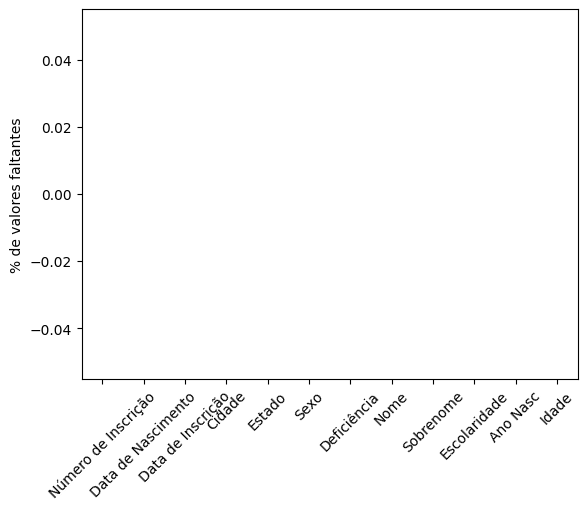

In [98]:
import matplotlib.pyplot as plt

na_pct = concurso.isna().sum() / len(concurso) * 100   # porcentagem por coluna
na_pct.plot(kind='bar', rot=45)
plt.ylabel('% de valores faltantes')
plt.show()


In [99]:
print(concurso.isna().sum())
print(concurso.isna().sum().sum())
print(na_pct)


Número de Inscrição    0
Data de Nascimento     0
Data de Inscrição      0
Cidade                 0
Estado                 0
Sexo                   0
Deficiência            0
Nome                   0
Sobrenome              0
Escolaridade           0
Ano Nasc               0
Idade                  0
dtype: int64
0
Número de Inscrição    0.0
Data de Nascimento     0.0
Data de Inscrição      0.0
Cidade                 0.0
Estado                 0.0
Sexo                   0.0
Deficiência            0.0
Nome                   0.0
Sobrenome              0.0
Escolaridade           0.0
Ano Nasc               0.0
Idade                  0.0
dtype: float64


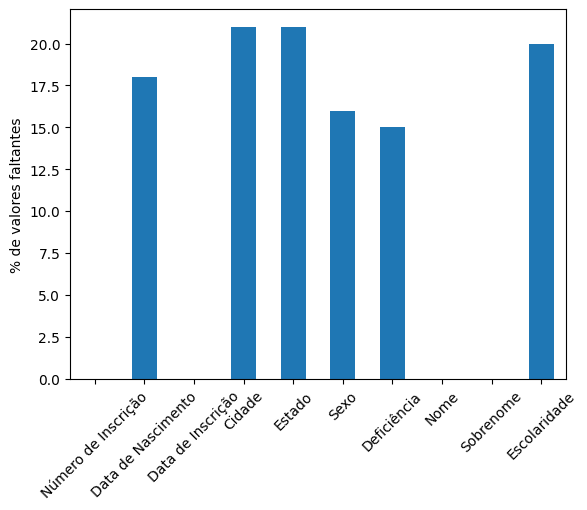

In [100]:
concurso = pd.read_csv('/content/dados_concurso.csv')  # corrigido para o nome do arquivo correto

na_pct = concurso.isna().sum() / len(concurso) * 100
na_pct.plot(kind='bar', rot=45)
plt.ylabel('% de valores faltantes')
plt.show()

In [101]:
concurso_raw = concurso.copy()          # original, com NaN
# ... aqui você faz o fillna em 'concurso' ...
na_pct = concurso_raw.isna().sum() / len(concurso_raw) * 100
